In [1]:
import os
import json
import pandas as pd
from src.paths import DATA_DIR


import matplotlib.pyplot as plt


import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
from collections import Counter
print(DATA_DIR)

/home/mathieujcqs/projet/perso/rap_rhymes_detection/data


In [3]:
def read_json_files(folder_path):
    all_songs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)
                for song_name, song_details in data.items():
                    song_details['song_name'] = song_name
                    song_details['artist_name'] = file_name.replace(".json", '')
                    all_songs.append(song_details)
    return all_songs

In [4]:
songs_data = read_json_files(DATA_DIR / 'raw')

df = pd.DataFrame(songs_data)
df['lyrics'] = df['lyrics'].astype("string")
df.head()

,lyrics,verses,refrains,song_name,artist_name
0,1 Contributor This song is an instrumental Embed,[],[],3305,Ikaz Boi
1,10 Contributors 46 ET DEMI Lyrics [Paroles de ...,[],[],46 ET DEMI,Ikaz Boi
2,7 Contributors 4K Lyrics [Couplet 1] Maquiller...,"[Maquiller, Maquiller, Maquiller\nChérie va te...","[Elle recommence, elle recommence\nÀ casser le...",4K,Ikaz Boi
3,"11 Contributors 911 Lyrics [Paroles de ""911"" f...","[911 garé dans l'parking (Cette life), ces nig...","[Hey, hey, hey (Hey, hey, hey)\nOn va pull-up ...",911,Ikaz Boi
4,9 Contributors Alfred Lyrics [Intro : Zefor] V...,[],[],Alfred,Ikaz Boi


In [6]:
df['nb_characters'] = df['lyrics'].apply(lambda x: len(x) if pd.notnull(x) else 0)
df['nb_words'] = df.lyrics.apply(lambda x: len(x.strip().split()) if pd.notnull(x) else 0)
df.head()

,lyrics,verses,refrains,song_name,artist_name,nb_characters,nb_words
0,1 Contributor This song is an instrumental Embed,[],[],3305,Ikaz Boi,48,8
1,10 Contributors 46 ET DEMI Lyrics [Paroles de ...,[],[],46 ET DEMI,Ikaz Boi,2837,493
2,7 Contributors 4K Lyrics [Couplet 1] Maquiller...,"[Maquiller, Maquiller, Maquiller\nChérie va te...","[Elle recommence, elle recommence\nÀ casser le...",4K,Ikaz Boi,2144,369
3,"11 Contributors 911 Lyrics [Paroles de ""911"" f...","[911 garé dans l'parking (Cette life), ces nig...","[Hey, hey, hey (Hey, hey, hey)\nOn va pull-up ...",911,Ikaz Boi,2720,484
4,9 Contributors Alfred Lyrics [Intro : Zefor] V...,[],[],Alfred,Ikaz Boi,2574,440


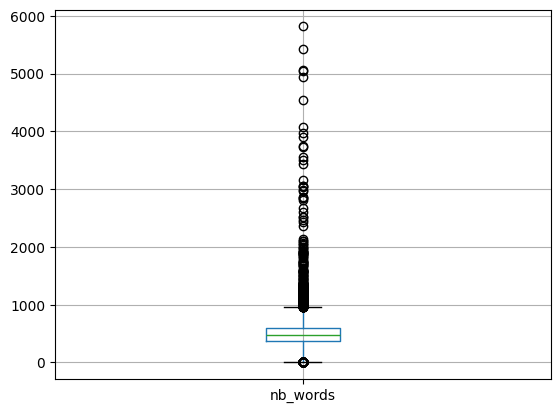

In [7]:
df.boxplot(column='nb_words')
plt.show()

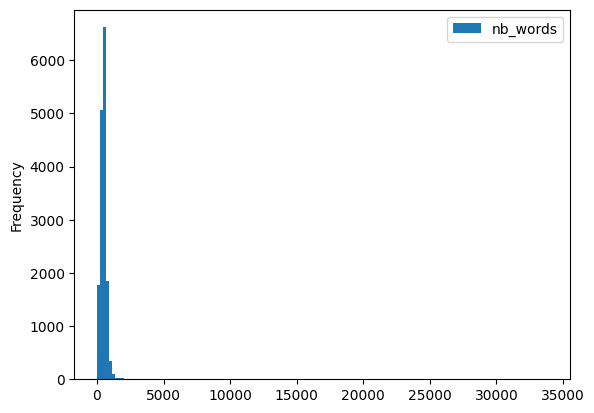

In [8]:
df.plot.hist(column= 'nb_words' ,bins=150)
plt.show()

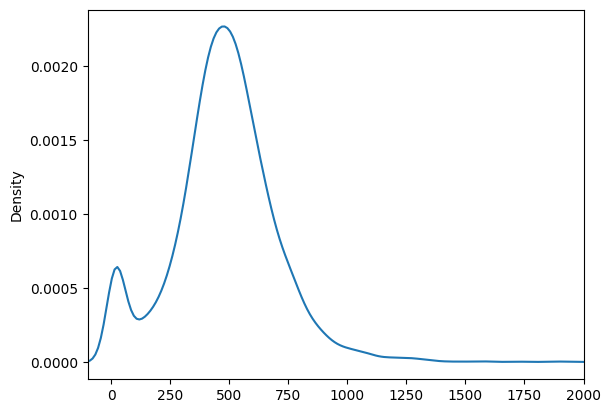

In [9]:
df.nb_words.plot(kind='kde', xlim=(-100,2000))
plt.show()

In [10]:
df.nb_words.skew()

4.011158388108561

In [11]:
df.nb_words.min()

0

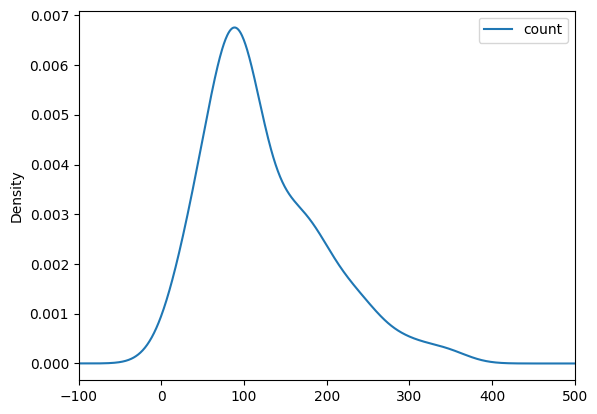

In [12]:
artist_groupby = df.groupby(by='artist_name').agg({'nb_words':['sum','mean'], 'lyrics':'count'})
artist_groupby.lyrics.plot(kind='kde', xlim=(-100,500))
plt.show()


In [13]:
len(artist_groupby)

129

In [55]:
len(df.loc[(df.nb_words <= 1000) & (df.nb_words >= 300)])

12899

In [65]:
example = df.loc[(df.nb_words == 1000)].copy()

In [79]:
nlp = spacy.load("fr_core_news_sm")

example["clean_str"] = example["lyrics"].apply(lambda x: " ".join([word for word in x.lower().strip().split() if word not in STOP_WORDS]))
example['lemma_str'] = example['clean_str'].apply(lambda x: " ".join([word.lemma_ for word in nlp(x)]))
example.head()

In [95]:
example["most_frequent_words_top_5"] = example['clean_str'].apply(lambda x: Counter(x.strip().split()).most_common(5))
example["most_frequent_word"] = example['most_frequent_words_top_5'].apply(lambda x: x[0][0])
example.head()


array(['2 contributor mort lyric [ refrain ] chapitre advenir mort sach mort ce être sortir le âm corps le ange ( azraël ( عزرائیل ) ) le ôte enveloppe corporel corps répondre le âme , lui , éternel 36 chemin 2 issuer le enfer paradis que importer de où te être issue que importer origine rang social couleur nombre diplômе mort passe prendrе le heure beaucoup aveugler mond courir le argent commettre acte immonde viendra jour compte chapitrer advenir mort je te racont [ couplet 1 ] douleur équivalent coup de éper le âme mécréer ... retirer ce être grand douleur jamais ressentir mécréer mort se être repentir sach que , ici te enterre tombe conscient entend bruit semelle compagnon se éloigner venir ange couleur noir bleu mounkar nakir , être face mécréant , aspect effrayer asseoir poser question " que dire - tu propos homme mouhamed ? " asseoir , mécréer répond : " je ne savoir dire ce que dire de luire " " certes ne avoir rien savoir ne avoir rien dire " ange frappent masse fer masser fer

In [97]:
lexicon_df = pd.read_csv('../data/extrernal/FEEL.csv', delimiter=';')
lexicon_df.head()

,id,word,polarity,joie,peur,tristesse,colère,surprise,dégout
0,1,à ce endroit là,positive,0,0,0,0,0,0
1,2,à le hâte,negative,0,1,0,0,1,0
2,3,à part,negative,0,0,1,0,0,0
3,4,à pic,negative,0,1,0,0,0,0
4,5,à rallonge,negative,0,0,1,0,0,0


In [100]:
lexicon_df = lexicon_df.drop_duplicates(subset='word')
emotion_dict = lexicon_df.set_index('word')[['joie', 'peur', 'tristesse', 'colère', 'surprise', 'dégout']].to_dict(orient='index')

def get_word_emotion(emotion_dict, word):
    return [emotion for emotion, present in emotion_dict.get(word, {}).items() if present]

def analyze_lyrics(lyrics, emotion_dict):
    words = lyrics.lower().strip().split()
    emotions = [emotion for word in words for emotion in get_word_emotion(emotion_dict, word)]

    return emotions

def get_most_frequent_sentiment(lyrics, emotion_dict):

    emotions = analyze_lyrics(lyrics, emotion_dict)

    if emotions:
        emotions_counts = Counter(emotions)
        return emotions_counts.most_common(1)[0][0]
    else:
        return 'neutre'
    
example['main_sentiment'] = example["lemma_str"].apply(lambda x: get_most_frequent_sentiment(x, emotion_dict))
example.main_sentiment.values
    

array(['tristesse'], dtype=object)

In [19]:
from transformers import AutoTokenizer

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model)
df['token_lenght'] = df.lyrics.apply(lambda x: len(tokenizer(x).input_ids) if pd.notnull(x) else 0)

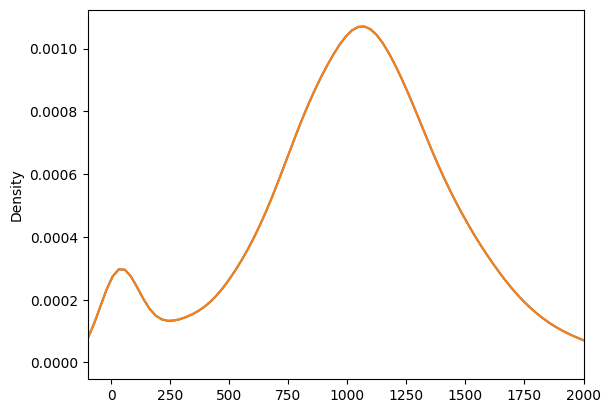

In [21]:
df.token_lenght.plot(kind='kde', xlim=(-100,2000))
plt.show()

In [26]:
df = df.loc[(df.nb_words <= 1000) & (df.nb_words >= 300)]
df.token_lenght.max()

2654